In [1]:
from pathlib import Path
import pandas as pd
import plotnine as p9
from datetime import date
import numpy as np
import statsmodels.api as sm
import re
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read GeoIDs - State.csv and COVID - State - Daily.csv
GeoIDs_States = pd.read_csv("GeoIDs - State.csv")
COVID_State_Daily = pd.read_csv("COVID - State - Daily.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
# combine two data sets
states = pd.merge(GeoIDs_States,COVID_State_Daily,on="statefips")

In [4]:
# index of rows with data
index1 = states.vaccine_rate[states.vaccine_rate!= '.'].index
index2 = states.new_case_count[states.new_case_count!= '.'].index
index = sorted(list(set(index1).intersection(set(index2))))

In [5]:
# select nonempty data
subset = states.iloc[index]
subset["vaccine_rate"] = subset["vaccine_rate"].astype(float)
subset["new_case_count"] =subset["new_case_count"].astype(int)

<ipython-input-5-c5bf2107aef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-5-c5bf2107aef1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# create subset large_state, where new_case_count > 5000 at least once
large_state_index = subset[subset["new_case_count"] > 5000].stateabbrev.unique()
large_state_index = set(large_state_index)
large_state = subset[subset['stateabbrev'].isin(large_state_index)]

In [7]:
# create subset middle_state, where new_case_count > 1500 at least once and not in large_state
middle_state_index = subset[subset["new_case_count"] > 1500].stateabbrev.unique()
middle_state_index = middle_state_index.tolist()
middle_state_index = set(middle_state_index) -set(large_state_index)
middle_state = subset[subset['stateabbrev'].isin(middle_state_index)]

In [8]:
# create subset small_state, where new_case_count > 0 at least once and not in large_state or middle_state
small_state_index = subset[subset["new_case_count"] > 0].stateabbrev.unique()
small_state_index = small_state_index.tolist()
small_state_index = set(small_state_index) - set(middle_state_index) -set(large_state_index)
small_state = subset[subset['stateabbrev'].isin(small_state_index)]

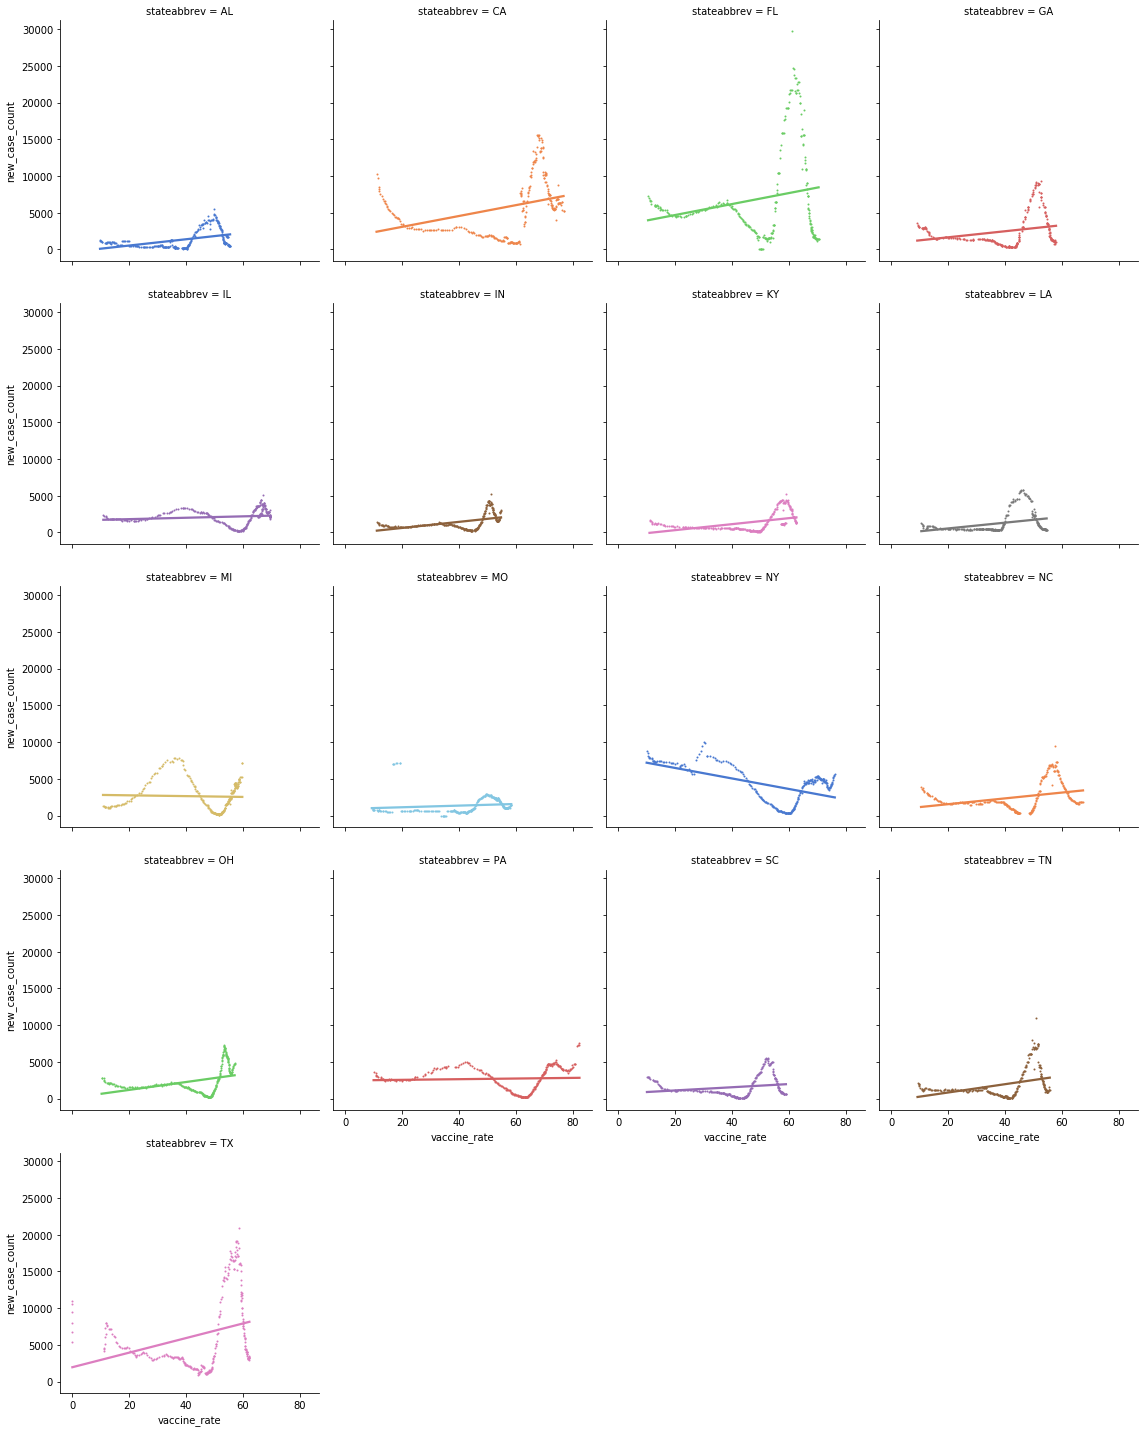

In [9]:
# regression plot on large_state
sns.lmplot(x="vaccine_rate", y="new_case_count", col="stateabbrev", hue="stateabbrev", data=large_state,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 1, "alpha": 1})
plt.savefig('large_state.png')

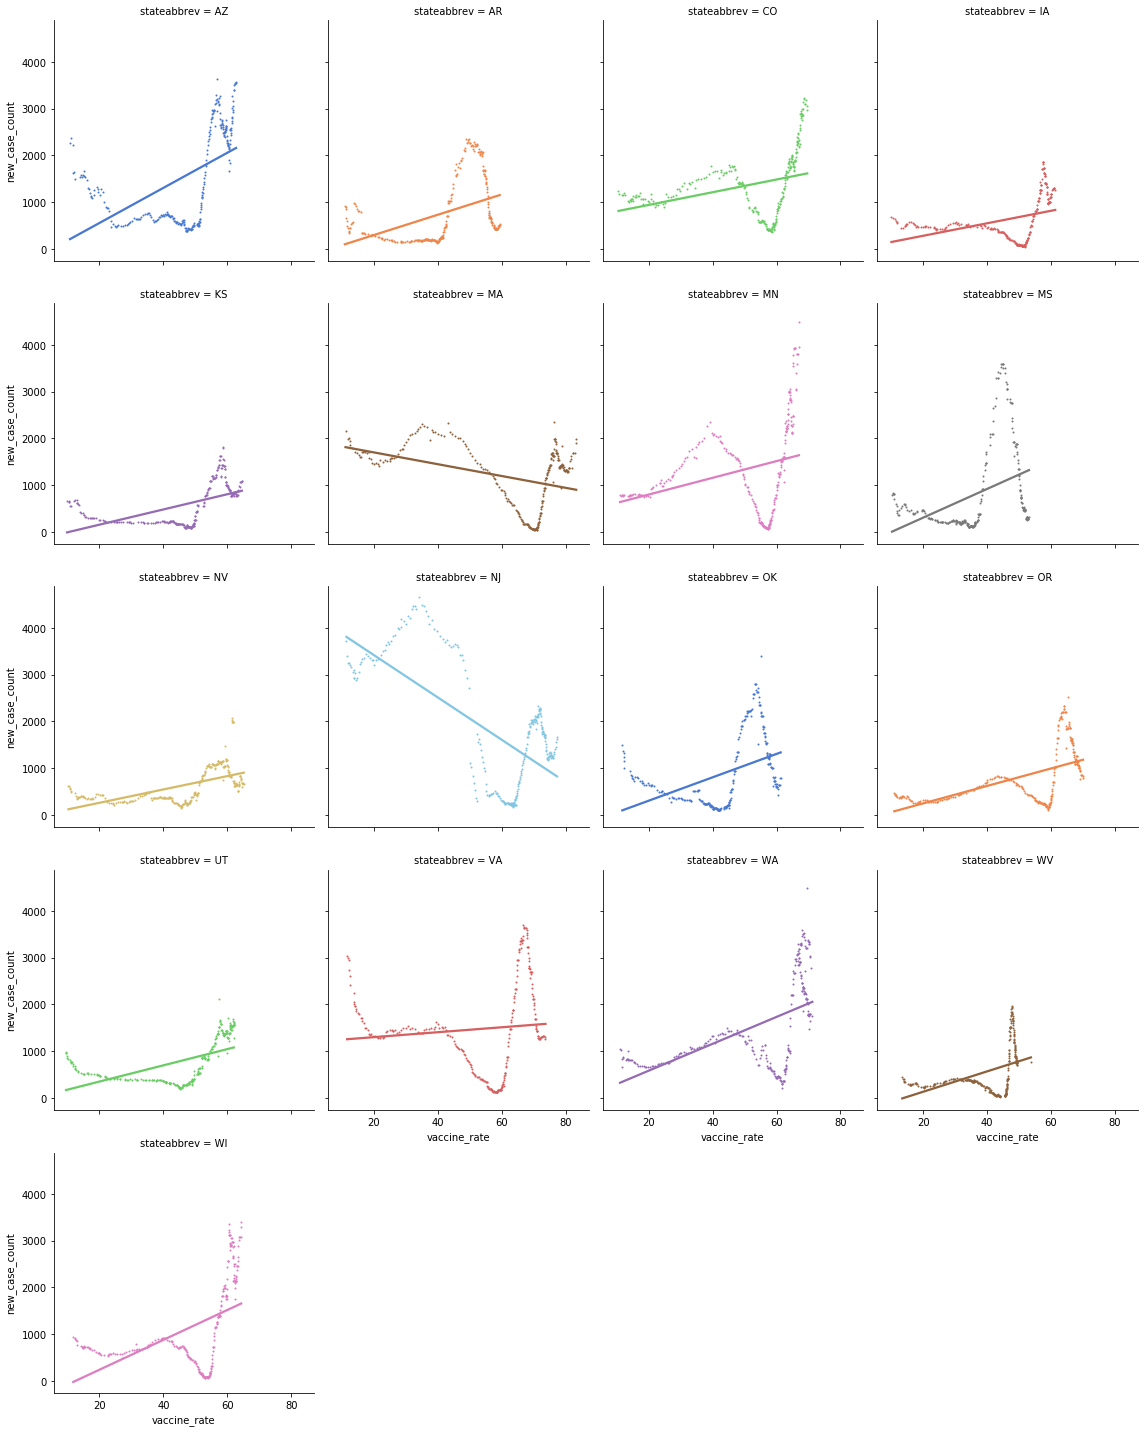

In [10]:
# regression plot on middle_state
sns.lmplot(x="vaccine_rate", y="new_case_count", col="stateabbrev", hue="stateabbrev", data=middle_state,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 1, "alpha": 1})
plt.savefig('middle_state.png')

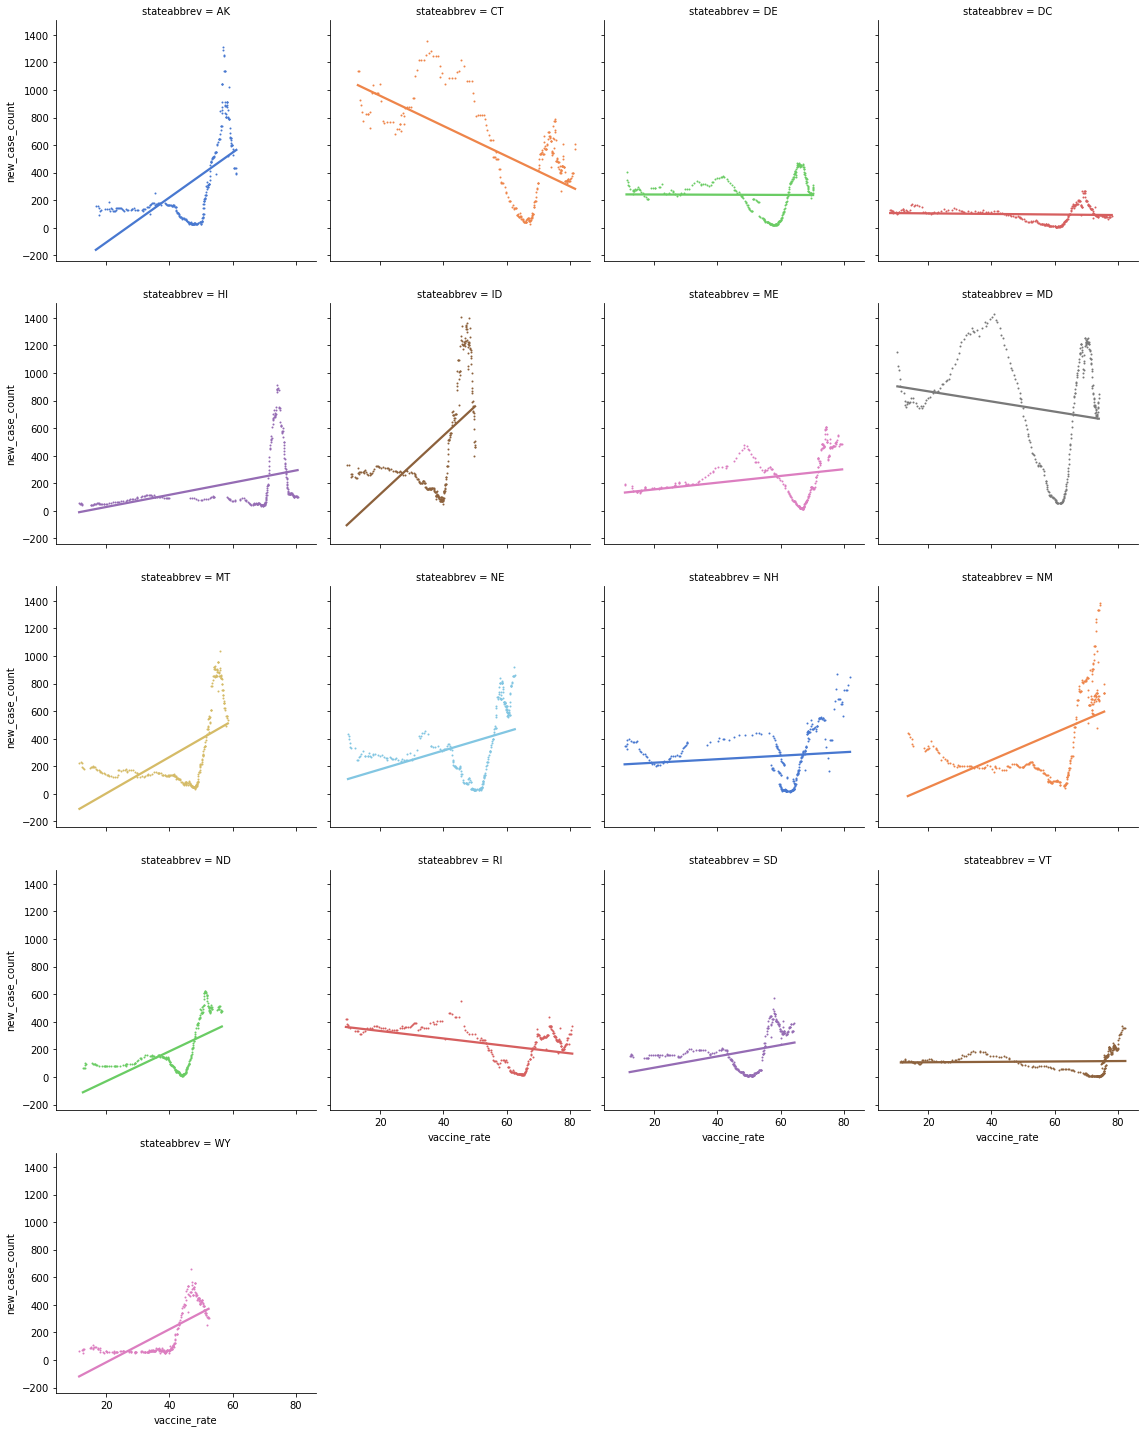

In [11]:
# regression plot on small_state
sns.lmplot(x="vaccine_rate", y="new_case_count", col="stateabbrev", hue="stateabbrev", data=small_state,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 1, "alpha": 1})
plt.savefig('small_state.png')